In [2]:
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('DeepFM_Mean0.41020_Std0.01625.csv')

In [6]:
df2 = pd.read_csv('val.csv')

In [7]:
from sklearn.metrics import roc_auc_score

print (roc_auc_score(df2['click'],df['target']))

0.7430656102324606


In [8]:
df3 = pd.concat([df2, df['target']],axis = 1)

In [9]:
df3.head()

,click,weekday,hour,region,city,adexchange,slotwidth,slotheight,slotprice,advertiser,...,browser_chrome,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,target
0,0,4,20,79,79,1,160,600,0,1458,...,0,0,1,0,0,0,0,0,0,0.00475
1,0,1,21,79,79,1,950,90,0,3476,...,1,0,0,0,0,0,0,0,0,0.00262
2,0,4,8,2,2,2,300,250,5,3358,...,0,0,1,0,0,0,0,0,0,0.00323
3,0,5,15,201,205,2,336,280,5,3358,...,1,0,0,0,0,0,0,0,0,0.00283
4,0,1,18,134,135,2,200,200,5,3476,...,1,0,0,0,0,0,0,0,0,0.00474


In [10]:
val = pd.read_csv('validation.csv')

In [11]:
df3 = pd.concat([df3, val['payprice']],axis = 1)

In [12]:
avg_ctr = np.mean(df3.click)

In [13]:
df3.head()

,click,weekday,hour,region,city,adexchange,slotwidth,slotheight,slotprice,advertiser,...,browser_firefox,browser_ie,browser_maxthon,browser_opera,browser_other,browser_safari,browser_sogou,browser_theworld,target,payprice
0,0,4,20,79,79,1,160,600,0,1458,...,0,1,0,0,0,0,0,0,0.00475,23
1,0,1,21,79,79,1,950,90,0,3476,...,0,0,0,0,0,0,0,0,0.00262,75
2,0,4,8,2,2,2,300,250,5,3358,...,0,1,0,0,0,0,0,0,0.00323,65
3,0,5,15,201,205,2,336,280,5,3358,...,0,0,0,0,0,0,0,0,0.00283,6
4,0,1,18,134,135,2,200,200,5,3476,...,0,0,0,0,0,0,0,0,0.00474,5


# Linear Bidding

In [47]:
def ad1_spend(x,df):
    clicks=0
    budget=6250000
    #avg_ctr=df3['click'].sum()/len(df3)
    df['bid']=x*df['target']/avg_ctr
    for i in range(len(df)):
        #print(i)
        y = df['payprice'].iloc[i]
        b=df['bid'].iloc[i]
        if budget <= y:
            break
        if (b>=y and b >=df['slotprice'].iloc[i]):
            budget -= df['payprice'].iloc[i]
            clicks += df['click'].iloc[i]
    spend = 6250000-budget
    return clicks,spend

In [24]:
sp3_tr=[]
c3_tr=[]
ad3=df3.copy()
range_bid_base=np.arange(8.0,9.0,0.1)
for bid_base in range_bid_base:
    print(bid_base)
    a, b = ad1_spend(bid_base,ad3)
    c3_tr.append(a)
    sp3_tr.append(b)
    print('clicks:',a)
    print('spend:',b)
print(sp3_tr)
print(c3_tr)

8.0
clicks: 119
spend: 5553441
8.1
clicks: 121
spend: 5658464
8.2
clicks: 123
spend: 5765672
8.299999999999999
clicks: 126
spend: 5869907
8.399999999999999
clicks: 126
spend: 5972755
8.499999999999998
clicks: 127
spend: 6067115
8.599999999999998
clicks: 128
spend: 6168816
8.699999999999998
clicks: 128
spend: 6249896
8.799999999999997
clicks: 128
spend: 6249992
8.899999999999997
clicks: 125
spend: 6249878
[5553441, 5658464, 5765672, 5869907, 5972755, 6067115, 6168816, 6249896, 6249992, 6249878]
[119, 121, 123, 126, 126, 127, 128, 128, 128, 125]


In [18]:
import matplotlib.pyplot as plt

In [25]:
dfm_lin = pd.DataFrame({'base_bid': range_bid_base,'clicks': c3_tr})
dfm_lin = dfm_lin.set_index('base_bid')

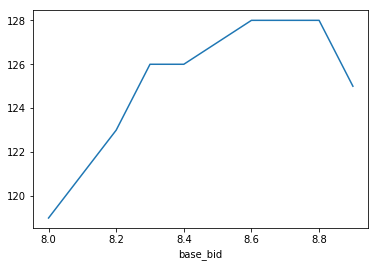

In [26]:
dfm_lin['clicks'].plot()
plt.show()

# Range-based Bidding

In [29]:
train_one = df3[df3['click']==1]

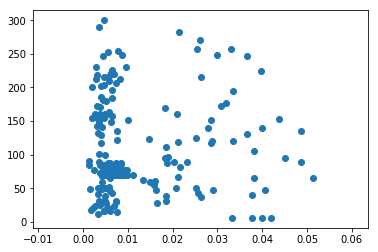

In [30]:
#x1 = df5[df5['target']>0.005]
#x2 = x1[x1['target']<0.006]
#print(x2.shape)
#y = x2['payprice']
#print(y.shape)
import matplotlib.pyplot as plt
x = train_one['target']
y = train_one['payprice']
plt.scatter(x, y)
plt.show()

In [31]:
for i in np.arange(0.004,0.0055,0.0005):
    train_two =train_one[train_one['target']>i]
    a = np.sort(train_two[train_two['target']<= i + 0.0005].reset_index()['payprice'])
    #print(a)
    if (len(a) == 0):
        continue
    elif (len(a) <= 2):
        print(i, '-', i+0.0005, ":", "0.8", ":", a[len(a)-1])
    else:
        print(i, '-', i+0.0005, ":", "0.8", ":", a[round(len(a)*0.8)])

for i in np.arange(0.0055,0.006,0.0001):
    train_two =train_one[train_one['target']>i]
    a = np.sort(train_two[train_two['target']<= i + 0.0001].reset_index()['payprice'])
    #print(a)
    if (len(a) == 0):
        continue
    else:
        print(i, '-', i+0.0001, ":", "1.0", ":", a[len(a)-1])
        
for i in np.arange(0.006,0.02,0.001):
    train_two =train_one[train_one['target']>i]
    a = np.sort(train_two[train_two['target']<= i + 0.001].reset_index()['payprice'])
    if (len(a) == 0):
        continue
    else:
        print(i, '-', i+0.001, ":", "1.0", ":", a[len(a)-1])

for i in np.arange(0.02,0.05,0.005):
    train_two =train_one[train_one['target']>i]
    a = np.sort(train_two[train_two['target']<= i + 0.005].reset_index()['payprice'])
    #print(a)
    if (len(a) == 0):
        continue
    else:
        print(i, '-', i+0.005, ":", "1.0", ":", a[len(a)-1])

0.004 - 0.0045000000000000005 : 0.8 : 186
0.0045000000000000005 - 0.005000000000000001 : 0.8 : 182
0.005000000000000001 - 0.005500000000000001 : 0.8 : 160
0.0055 - 0.0056 : 1.0 : 20
0.0056 - 0.0057 : 1.0 : 253
0.0057 - 0.0058000000000000005 : 1.0 : 217
0.0058000000000000005 - 0.005900000000000001 : 1.0 : 52
0.005900000000000001 - 0.006000000000000001 : 1.0 : 80
0.006000000000000001 - 0.006100000000000001 : 1.0 : 88
0.006 - 0.007 : 1.0 : 226
0.007 - 0.008 : 1.0 : 254
0.008 - 0.009000000000000001 : 1.0 : 248
0.009000000000000001 - 0.010000000000000002 : 1.0 : 231
0.01 - 0.011 : 1.0 : 151
0.011 - 0.012 : 1.0 : 70
0.013000000000000001 - 0.014000000000000002 : 1.0 : 62
0.014 - 0.015 : 1.0 : 124
0.015000000000000001 - 0.016 : 1.0 : 60
0.016 - 0.017 : 1.0 : 61
0.018000000000000002 - 0.019000000000000003 : 1.0 : 169
0.02 - 0.025 : 1.0 : 282
0.025 - 0.030000000000000002 : 1.0 : 270
0.030000000000000002 - 0.035 : 1.0 : 257
0.035 - 0.04 : 1.0 : 247
0.04000000000000001 - 0.045000000000000005 : 1.0

In [36]:

def fill_bid(x, target):
    df3['bid']=""
    bid = 0
    if (target > 0.04):
        bid = 155
    elif (target >= 0.035):
        bid = 250
    elif (target >= 0.03):
        bid= 260
    elif (target >= 0.025):
        bid = 271
    elif (target >= 0.02):
        bid = 285
    #elif (target >= 0.019):
       # bid = 55
    elif (target >= 0.018):
        bid = 170
    #elif (target >= 0.017):
     #   bid = 120
    elif (target >= 0.016):
        bid = 100
    elif (target >= 0.015):
        bid = 100
    elif (target >= 0.014):
        bid = 130
    elif (target >= 0.013):
        bid = 100
   # elif (target >= 0.012):
     #   bid = 125
    elif (target >= 0.01):
        bid = 155
    elif (target >= 0.009):
        bid = 235
    elif (target >= 0.008):
        bid = 250
    elif (target >= 0.007):
        bid = 255
    elif (target >= 0.006):
        bid = 230
    elif (target >= 0.0059):
        bid = 85
    elif (target >= 0.0058):
        bid = 55 
    elif (target >= 0.0057):
        bid = 220
    elif (target >= 0.0056):
        bid = 255 #90
    elif (target >= x):
        bid = 21 #90
    else:
        bid = 0
    return bid

#df3['bid'] = df3.apply(lambda row: fill_bid(row['target']), axis=1)

In [37]:
def final_spend(df):
    clicks=0
    budget=6250000
    for i in range(len(df)):
        y = df['payprice'].iloc[i]
        b=df['bid'].iloc[i]
        if budget <= y:
            print("cutoff "+ str(i))
            break
        if (b>=y and b >=df['slotprice'].iloc[i]):
            budget -= df['payprice'].iloc[i]
            clicks += df['click'].iloc[i]
    spend = 6250000-budget
    print(clicks)
    print(spend)
    return clicks

In [45]:
range_cut = np.arange(0.004,0.006,0.0005)
y = []
for r in range_cut:
    print(r)
    df3['bid'] = df3.apply(lambda row: fill_bid(r, row['target']), axis=1)
    y.append(final_spend(df3))

0.004
cutoff 292609
126
6249922
0.0045000000000000005
cutoff 295702
128
6249735
0.005000000000000001
cutoff 298216
128
6249909
0.005500000000000001
cutoff 299770
128
6249953


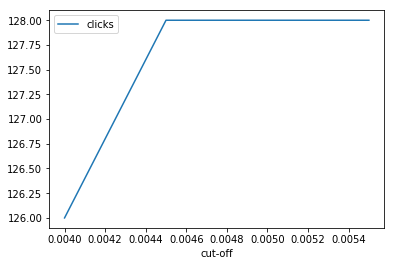

In [46]:
dfm_rbb = pd.DataFrame({'cut-off': range_cut,'clicks': y})
dfm_rbb = dfm_rbb.set_index('cut-off')
dfm_rbb.plot()
plt.show()